# 5/09/2022

# Computer Vision

# TUN_KUN_topish

# Muallif: Farrux Sotivoldiyev

In [2]:
# Kutubxonalar
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
# Test va Train pathlari tayyorlab olish
test_path = "DATA/tun_kun/test/"
train_path = "DATA/tun_kun/training/"

In [4]:
# Tepadagi path lardan foydalangan holda filedan rasmlarni o'qish RGB
def get_data_rgb(path):
    rasmlar = []
    turi = ["day","night"]
    for i in turi:
        for rasm_path in glob.glob(os.path.join(path,i,"*")):
            rasm = cv2.imread(rasm_path)
            rasm = cv2.cvtColor(rasm,cv2.COLOR_BGR2RGB)
            rasmlar.append((rasm,i))
    return rasmlar

In [5]:
# RGB dan HSV ga o'tqazib olish
def get_data_hsv(rasmlar):
    rasmlar_hsv = []
    for i,j in rasmlar:
        rasm = cv2.cvtColor(i,cv2.COLOR_RGB2HSV)
        rasmlar_hsv.append((rasm,j))
    return rasmlar_hsv

In [6]:
# rasmlarni o'qib o'zgaruvchilarga yozildi RGB
test_rasmlar_rgb = get_data_rgb(test_path)
train_rasmlar_rgb = get_data_rgb(train_path)

In [7]:
# RGB ni HSV ga aylantirib olamiz. Pastdagi barcha ishimiz HSV bilan
test_rasmlar_hsv = get_data_hsv(test_rasmlar_rgb)
train_rasmlar_hsv = get_data_hsv(train_rasmlar_rgb)

In [8]:
# train rasmlarda 240 ta rasm bor ekan
len(train_rasmlar_hsv)

240

In [9]:
# test rasmlarda 160 ta rasm bor ekan
len(test_rasmlar_hsv)

160

In [10]:
# trainga testni qo'shib bitta yaxlit train rasmlar to'plamini hosil qildik
train_rasmlar_hsv.extend(test_rasmlar_hsv)

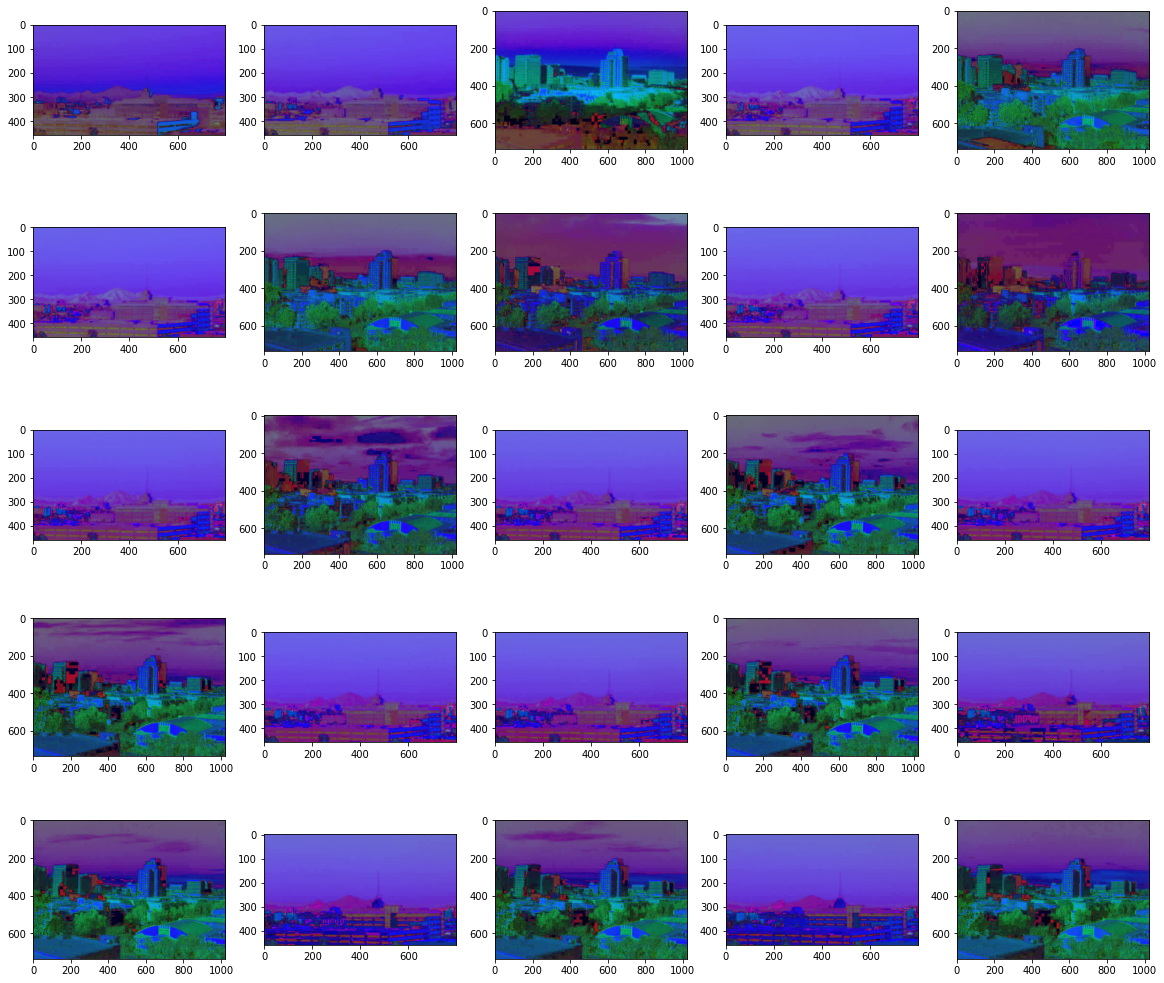

In [11]:
# Dastlabki 25 ta rasmni chiqarib taxlil qilamiz.Bundan ko'rinib turibdiki shapelari xar xil ularni bir xil 
# shape larga olib kelishimiz kerak.Ko'rinish HSV da 
figure,rasmlar = plt.subplots(5,5,figsize=(20,18))
k = 0
for i in range(5):
    for j in range(5):
        rasmlar[i][j].imshow(train_rasmlar_hsv[k][0])
        k += 1

## Rasmlarga ishlov berish

In [12]:
# Barcha rasmlarni eni va bo'yini alohida qilib olamiz
all_x_size = [i[0].shape[0] for i in train_rasmlar_hsv]
all_y_size = [i[0].shape[1] for i in train_rasmlar_hsv]

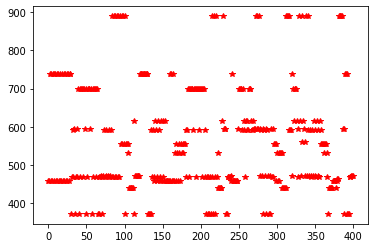

In [13]:
# Rasmlarning eni diagrammasi
plt.plot(np.arange(400),all_x_size,"r*")

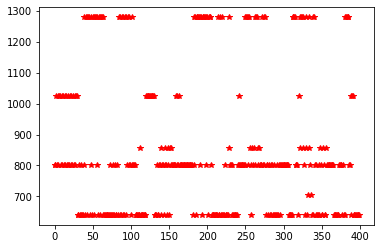

In [14]:
# Rasmlarning bo'yi diagrammasi
plt.plot(np.arange(400),all_y_size,"r*")

In [15]:
# rasmlarnin ortacha eni
all_x_size_mean = int(np.round(np.mean(all_x_size)))
all_x_size_mean

568

In [16]:
# rasmlarnin ortacha bo'yi
all_y_size_mean = int(np.round(np.mean(all_y_size)))
all_y_size_mean

856

In [17]:
# Endi barcha rasmlarni shu o'lchamlarga keltiramiz
def default_size(rasm):
    return cv2.resize(rasm,(all_y_size_mean,all_x_size_mean))

In [18]:
# Stringlarni(day or night) ham raqamlarga o'tkazamiz yani encoding qilamiz
def encod(flag):
    if flag=="day":
        return 1
    else:
        return 0

In [19]:
# Barcha rasmlarni standartlashtirdik
true_rasmlar = [(default_size(i),encod(j)) for i,j in train_rasmlar_hsv]

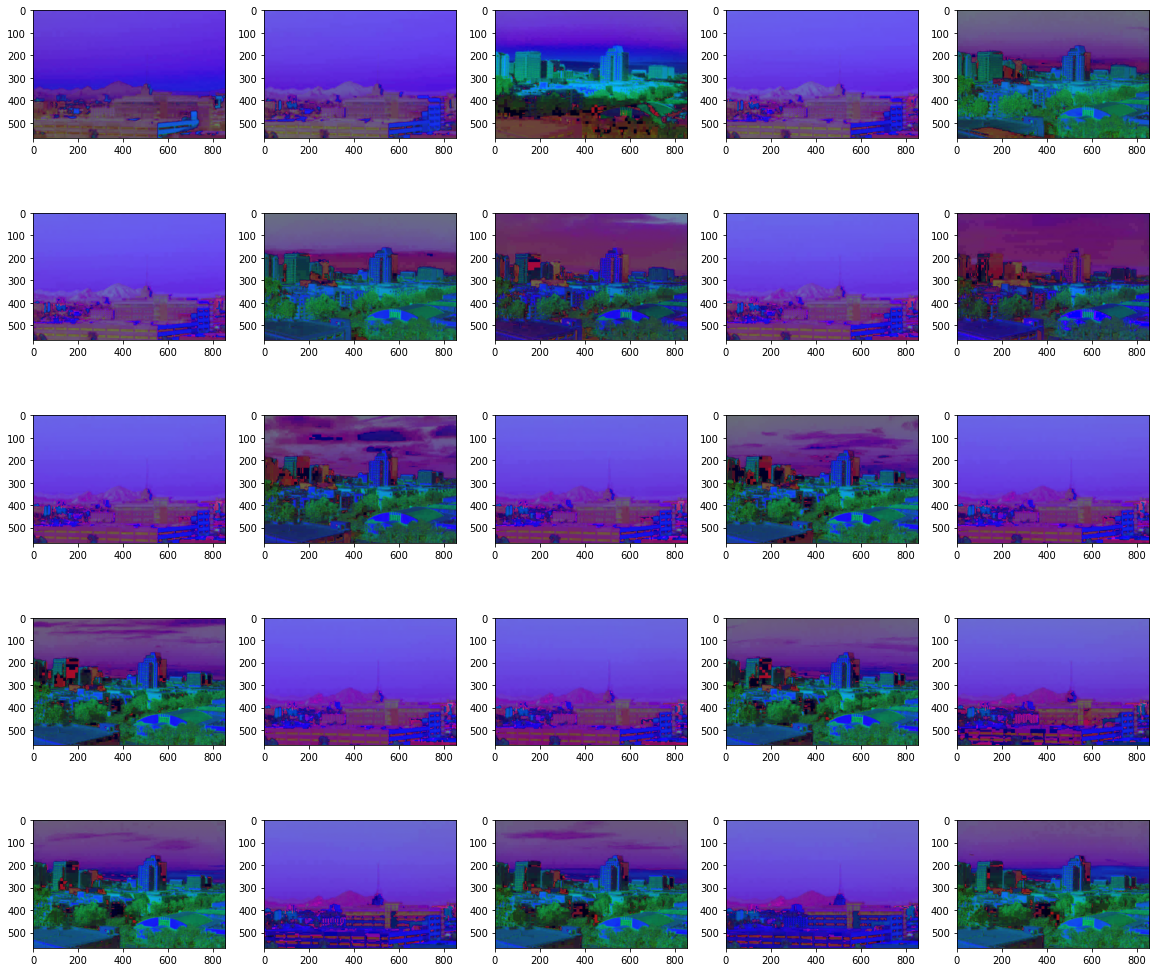

In [20]:
# Ana endi barcha rasmlar bir xil o'lchamga keldi. Ko'rinish HSV da gray
figure,rasmlar = plt.subplots(5,5,figsize=(20,18))
k = 0
for i in range(5):
    for j in range(5):
        rasmlar[i][j].imshow(true_rasmlar[k][0])
        k += 1

## Datasetni Train va Test ga bo'lish

In [21]:
kun = [(i,j) for i,j in true_rasmlar if j==1]
tun = [(i,j) for i,j in true_rasmlar if j==0]

In [22]:
len(kun)

200

In [23]:
len(tun)

200

In [24]:
# 80% - Train uchun
# 20% - Test uchun

# 100% - 200
# 80% - x = 160 = Train 

# 100% - 200
# 20% - x = 40 = Test 

In [25]:
# Train va Test ga ajratish
def train_and_test(data):
    train = []
    test = []
    nisbat = int(0.8 * len(data))
    for i in range(len(data)):
        if i<nisbat:
            train.append((data[i][0],data[i][1]))
        else:
            test.append((data[i][0],data[i][1]))
    return train , test

In [26]:
kun_train,kun_test = train_and_test(kun)
tun_train,tun_test = train_and_test(tun)

In [27]:
# train = kun_train + tun_train #80% - 320 ta rasm 
# test = kun_test + tun_test #20% - 80 ta rasm 

In [28]:
len(kun_train)

160

In [29]:
len(kun_test)

40

## Train

In [30]:
def light_value(data):
    value_chanel = []
    for i,j in data:
        value_chanel.append(i[:,:,2])
    return value_chanel

In [31]:
light_value_kun_train = light_value(kun_train)
light_value_tun_train = light_value(tun_train)

In [32]:
# Ularning sum larini hosil qilamiz 
train_kun_sum = [np.sum(i) for i in light_value_kun_train]
train_tun_sum = [np.sum(i) for i in light_value_tun_train]

In [33]:
len(train_kun_sum)

160

In [34]:
len(train_tun_sum)

160

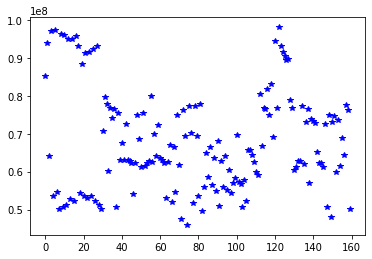

In [35]:
plt.plot(np.arange(160),train_kun_sum,"b*")

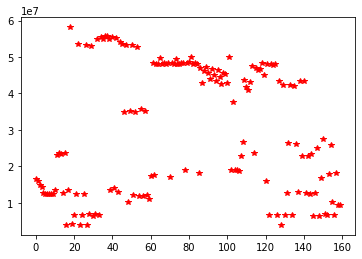

In [36]:
plt.plot(np.arange(160),train_tun_sum,"r*")

In [37]:
train_kun_info = {
    "kun_max" : np.max(train_kun_sum),
    "kun_mean" : np.mean(train_kun_sum),
    "kun_min" : np.min(train_kun_sum)
}

In [38]:
train_tun_info = {
    "tun_max" : np.max(train_tun_sum),
    "tun_mean" : np.mean(train_tun_sum),
    "tun_min" : np.min(train_tun_sum)
}

In [39]:
train_kun_info

{'kun_max': 98026797, 'kun_mean': 68013233.11875, 'kun_min': 45974397}

In [40]:
train_tun_info

{'tun_max': 58152076, 'tun_mean': 30687527.84375, 'tun_min': 3947553}

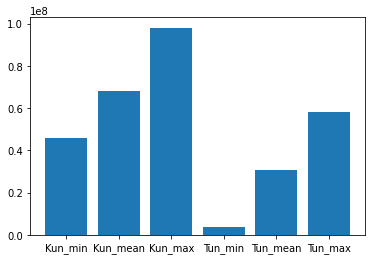

In [41]:
# Bu grafikdan ko'rinib turibdiki tunning maximumi kunning minimumidan kattaroq.
y = [train_kun_info["kun_min"],train_kun_info["kun_mean"],train_kun_info["kun_max"],train_tun_info["tun_min"],train_tun_info["tun_mean"],train_tun_info["tun_max"]]
x = ["Kun_min","Kun_mean","Kun_max","Tun_min","Tun_mean","Tun_max"]
plt.bar(x,y)
plt.show()

In [42]:
kun_tun_line = (train_kun_info['kun_mean'] + train_tun_info['tun_mean'])/2
kun_tun_line

49350380.48125

In [43]:
rasm_shape = all_x_size_mean * all_y_size_mean
rasm_shape

486208

In [44]:
line_norm = kun_tun_line / rasm_shape
line_norm

101.50055219422552

# Test

* Biz natijani oldik(Result = 101.50055219422552)! Kun va Tunni o'rtachasini topamiz va biz topgan son bilan solishtiramiz katta bo'lsa kun aks holda tun


In [45]:
test_rasmlar = kun_test + tun_test

In [46]:
len_test = len(test_rasmlar)
len_test

80

In [47]:
# Tepada test qilish uchun kun_test va tun_test o'zgaruvchilariga yuklangan tayyor rasmlarimiz bor
def sumlar(rasmlar):
    rasmlar_sum = []
    for i,j in rasmlar:
        rasmlar_sum.append((np.mean(i[:,:,2]),j))
    return rasmlar_sum

In [48]:
test_rasmlar_proba = sumlar(test_rasmlar)

In [49]:
def testing(rasmlar):
    xatolik = 0
    for i,j in rasmlar:
        if i<line_norm:
            target = 0
        else:
            target = 1
            
        if target!=j:
            xatolik += 1
    return xatolik

In [50]:
xatolik = testing(test_rasmlar_proba)

In [51]:
xatolik

11

In [52]:
natija_foizda = 100 - (xatolik*100) / len_test
natija_foizda

86.25

# Xulosa:
* Bizda rasmlarni tun kunga ajratish 86.25% bajarildi.